# USA - Accident Analysis and viz

In [3]:
import random
import pandas as pd 
import numpy as np 

# warnings
pd.options.mode.chained_assignment = None 
import warnings
warnings.filterwarnings("ignore")

# plotting  
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [4]:
df = pd.read_csv('US_Accidents_Dec19.csv')
df.head()

,Unnamed: 0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 50 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   ID                     object 
 2   Source                 object 
 3   TMC                    float64
 4   Severity               int64  
 5   Start_Time             object 
 6   End_Time               object 
 7   Start_Lat              float64
 8   Start_Lng              float64
 9   End_Lat                float64
 10  End_Lng                float64
 11  Distance(mi)           float64
 12  Description            object 
 13  Number                 float64
 14  Street                 object 
 15  Side                   object 
 16  City                   object 
 17  County                 object 
 18  State                  object 
 19  Zipcode                object 
 20  Country                object 
 21  Timezone               object 
 22  Airport_Code      

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Source', 'TMC', 'Severity', 'Start_Time',
       'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
len(df)

2974335

In [8]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2974335.0,1487167.00,858616.70,0.00,743583.50,1487167.00,2230750.50,2974334.00
TMC,2246264.0,207.83,20.33,200.00,201.00,201.00,201.00,406.00
Severity,2974335.0,2.36,0.54,1.00,2.00,2.00,3.00,4.00
Start_Lat,2974335.0,36.49,4.92,24.56,33.55,35.85,40.37,49.00
Start_Lng,2974335.0,-95.43,17.22,-124.62,-117.29,-90.25,-80.92,-67.11
End_Lat,728071.0,37.58,5.00,24.57,33.96,37.90,41.37,49.08
End_Lng,728071.0,-99.98,18.42,-124.50,-118.29,-96.63,-82.32,-67.11
Distance(mi),2974335.0,0.29,1.55,0.00,0.00,0.00,0.01,333.63
Number,1056730.0,5837.00,15159.28,0.00,837.00,2717.00,7000.00,9999997.00
Temperature(F),2918272.0,62.35,18.79,-77.80,50.00,64.40,76.00,170.60


# Filltering Data and find NAN values and removes

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

16

In [10]:
missing_values = df.isna().sum().sort_values(ascending=False) / len(df)
missing_values

End_Lng                  7.552155e-01
End_Lat                  7.552155e-01
Precipitation(in)        6.718672e-01
Number                   6.447172e-01
Wind_Chill(F)            6.228696e-01
TMC                      2.447845e-01
Wind_Speed(mph)          1.482146e-01
Weather_Condition        2.216697e-02
Visibility(mi)           2.208595e-02
Humidity(%)              1.989453e-02
Temperature(F)           1.884892e-02
Pressure(in)             1.618580e-02
Wind_Direction           1.516339e-02
Weather_Timestamp        1.234057e-02
Airport_Code             1.913369e-03
Timezone                 1.063431e-03
Zipcode                  2.958645e-04
Sunrise_Sunset           3.126749e-05
Civil_Twilight           3.126749e-05
Nautical_Twilight        3.126749e-05
Astronomical_Twilight    3.126749e-05
City                     2.790540e-05
Description              3.362096e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Source                   0.000000e+00
Severity    

In [11]:
missing_values[missing_values != 0]

End_Lng                  7.552155e-01
End_Lat                  7.552155e-01
Precipitation(in)        6.718672e-01
Number                   6.447172e-01
Wind_Chill(F)            6.228696e-01
TMC                      2.447845e-01
Wind_Speed(mph)          1.482146e-01
Weather_Condition        2.216697e-02
Visibility(mi)           2.208595e-02
Humidity(%)              1.989453e-02
Temperature(F)           1.884892e-02
Pressure(in)             1.618580e-02
Wind_Direction           1.516339e-02
Weather_Timestamp        1.234057e-02
Airport_Code             1.913369e-03
Timezone                 1.063431e-03
Zipcode                  2.958645e-04
Sunrise_Sunset           3.126749e-05
Civil_Twilight           3.126749e-05
Nautical_Twilight        3.126749e-05
Astronomical_Twilight    3.126749e-05
City                     2.790540e-05
Description              3.362096e-07
dtype: float64

In [12]:
type(missing_values)

pandas.core.series.Series

<AxesSubplot:>

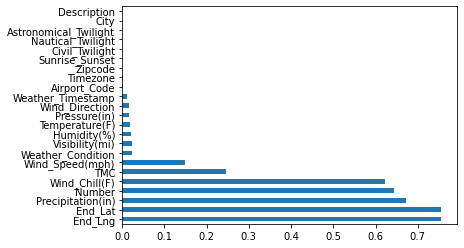

In [13]:
missing_values[missing_values != 0].plot(kind='barh')

###  Remove columns thats you dont want to use

In [14]:
df.columns # will use 1- city 2- start time 3- start lat,start lng 4-temperture 5-weather conditon

Index(['Unnamed: 0', 'ID', 'Source', 'TMC', 'Severity', 'Start_Time',
       'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [15]:
cities = df.City.unique()
len(cities)

11686

In [16]:
cities[:100]

array(['Dayton', 'Reynoldsburg', 'Williamsburg', 'Westerville',
       'Columbus', 'Miamisburg', 'Johnstown', 'Dublin',
       'Canal Winchester', 'Lebanon', 'Sabina', 'Goshen', 'Waynesville',
       'Springboro', 'Carroll', 'Oregonia', 'Independence',
       'Maple Heights', 'Grove City', 'Findlay', 'Fairborn', 'Piqua',
       'New Richmond', 'Batavia', 'Galena', 'Barberton', 'Akron',
       'Mansfield', 'Cleveland', 'Bethel', 'Pataskala', 'Seville',
       'Bellville', 'Troy', 'Wilmington', 'North Olmsted', 'Groveport',
       'Orient', 'Tiro', 'Strongsville', 'Beavercreek', 'Circleville',
       'Peebles', 'Hurricane', 'Xenia', 'Elyria', 'Pickerington',
       'Burbank', 'Zanesville', 'North Baltimore', 'Mount Sterling',
       'Tipp City', 'Moraine', 'Hilliard', 'Bowling Green', 'Maineville',
       'Vermilion', 'Milford', 'Brookpark', 'Fraziers Bottom',
       'Cambridge', 'Delaware', 'Moscow', 'Oberlin', 'Sardinia',
       'Lewis Center', 'Urbancrest', 'Brecksville', 'Frankfort',

In [17]:
cities_by_acc = df.City.value_counts()
cities_by_acc

Houston                         93289
Charlotte                       68054
Los Angeles                     65851
Austin                          58703
Dallas                          58036
                                ...  
Amherst Junction                    1
Miller                              1
Glenwood Landing                    1
New Roads                           1
American Fork-Pleasant Grove        1
Name: City, Length: 11685, dtype: int64

In [18]:
cities_by_acc[:20]

Houston          93289
Charlotte        68054
Los Angeles      65851
Austin           58703
Dallas           58036
Raleigh          39628
Atlanta          37591
Miami            31160
Oklahoma City    30787
Baton Rouge      30232
Nashville        27855
Orlando          26138
Sacramento       25657
Seattle          23745
Phoenix          23044
Minneapolis      22150
San Antonio      21880
San Diego        21045
Richmond         18842
Indianapolis     18244
Name: City, dtype: int64

In [19]:
type(cities_by_acc)

pandas.core.series.Series

<AxesSubplot:>

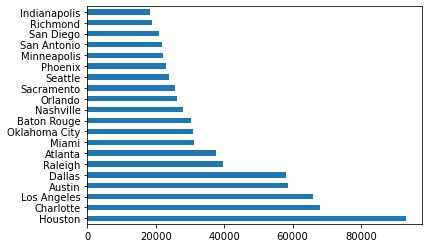

In [20]:
cities_by_acc[:20].plot(kind='barh')